In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os

In [2]:
df=pd.read_csv("datasets_33180_43520_heart (2).csv",sep=",")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
print('Data First 5 Rows Show\n')
df.head()

Data First 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Data Last 5 Rows Show\n')
df.tail()

Data Last 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# age: l'âge de la personne en années

# sexe: le sexe de la personne (1 = homme, 0 = femme)

# cp: la douleur thoracique ressentie (valeur 1: angor typique, valeur 2: angor atypique, valeur 3: douleur non angineuse, valeur 4: asymptomatique)

# trestbps: tension artérielle au repos de la personne (mm Hg à l'admission à l'hôpital)

# chol: mesure du cholestérol de la personne en mg / dl

# fbs: glycémie à jeun de la personne (> 120 mg / dl, 1 = vrai; 0 = faux)

# restecg: mesure électrocardiographique au repos (0 = normal, 1 = ayant une anomalie de l'onde ST-T, 2 = montrant une hypertrophie ventriculaire gauche probable ou définitive selon les critères d'Estes)

# thalach: fréquence cardiaque maximale atteinte par la personne

# exang: angor induit par l'exercice (1 = oui; 0 = non)

# oldpeak: dépression ST induite par l'exercice par rapport au repos («ST» se rapporte aux positions sur le tracé ECG. Pour en savoir plus)

# pente: la pente du segment ST de pointe de l'exercice (Valeur 1: pente ascendante, Valeur 2: plate, Valeur 3: pente descendante)

# ca: Le nombre de navires principaux (0-3)

# thal: trouble sanguin appelé thalassémie (3 = normal; 6 = défaut fixe; 7 = défaut réversible)

# cible: Maladie cardiaque (0 = non, 1 = oui)

In [5]:
print('Data Show Describe\n')
df.describe()

Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# La fonction de description est une fonction qui permet l'analyse entre les valeurs numériques contenues dans l'ensemble de données. En utilisant cette fonction, comptez, moyenne, std, min, max, 25%, 50%, 75%.

# Comme vu dans cette section, la plupart des valeurs sont généralement catégorisées. Cela signifie que nous devons intégrer d'autres valeurs dans cette situation. Celles-ci; âge, trestbps, chol, thalach.

In [6]:
print('Data Show Info\n')
df.info()


Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print('Data Show Columns:\n')
df.columns

Data Show Columns:



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
#And, how many rows and columns are there for all data?
print('Data Shape Show\n')
df.shape  #first one is rows, other is columns

Data Shape Show



(303, 14)

In [9]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
df.isnull().sum()


Data Sum of Null Values 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#all rows control for null values
df.isnull().values.any()

False

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

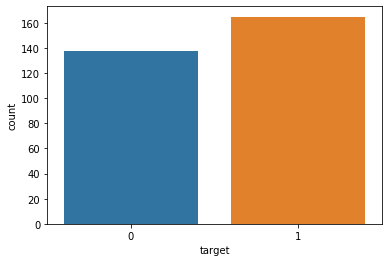

In [12]:
sns.countplot(data=df,x='target')

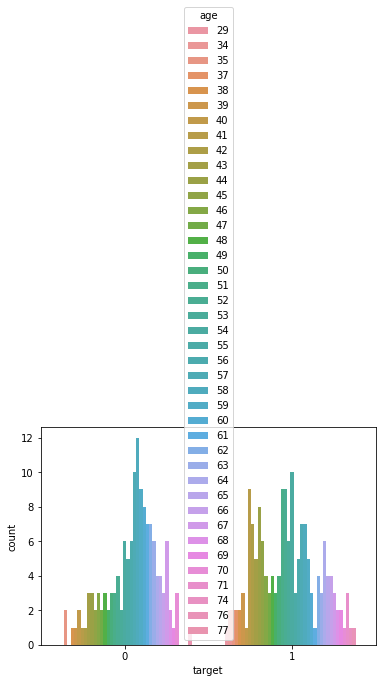

In [13]:

sns.countplot(data= df ,x='target', hue='age')

In [14]:
df[df.target==1].groupby(['sex']).target.count()

sex
0    72
1    93
Name: target, dtype: int64

In [15]:
#voir le score des male et female qui ont probablement un risque d'une crise cardiaque
print(' female:',(df[df.sex == 0].target.sum())/(df[df.sex == 0].target.count()))
print(' male:',(df[df.sex == 1].target.sum())/(df[df.sex == 1].target.count()))

 female: 0.75
 male: 0.4492753623188406


In [16]:
df["sex"].isnull().sum()

0

In [17]:
df[df.sex == 0].target

2      1
4      1
6      1
11     1
14     1
      ..
289    0
292    0
296    0
298    0
302    0
Name: target, Length: 96, dtype: int64

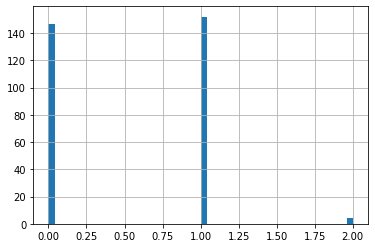

In [18]:
df.restecg.hist(bins=50)

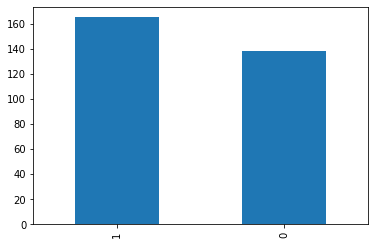

In [19]:
#histogramme des males(1)et des females(0)
df["target"].value_counts().plot(kind='bar')

Let's see how the correlation values between them


In [20]:
def plot_correlation_map( df ):

    corr= df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

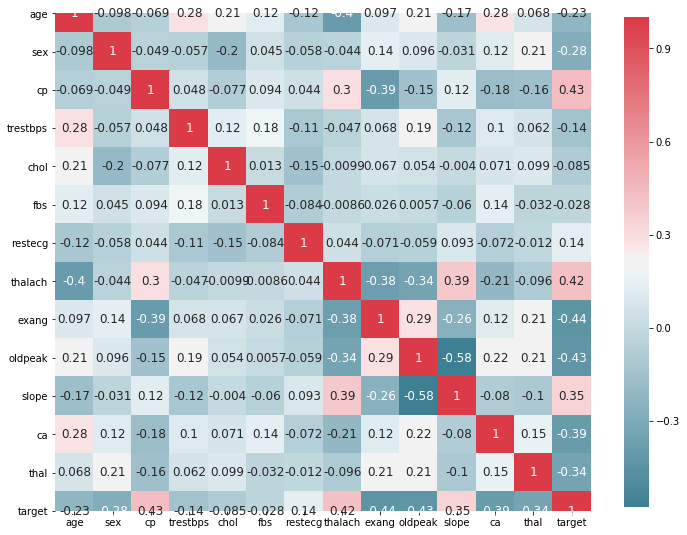

In [21]:
plot_correlation_map(df)

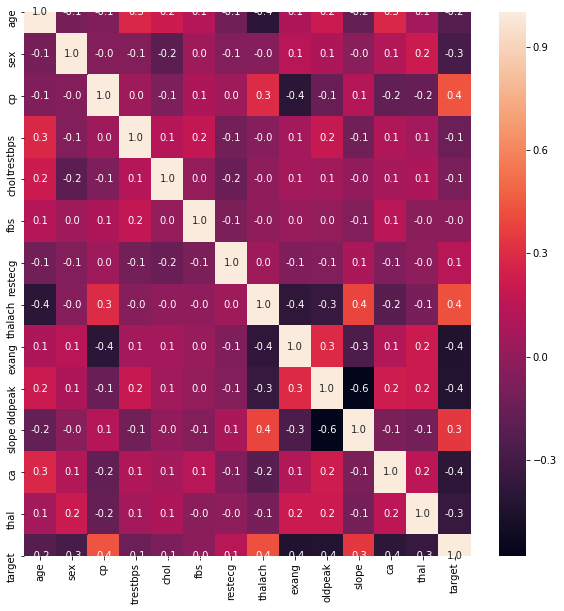

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

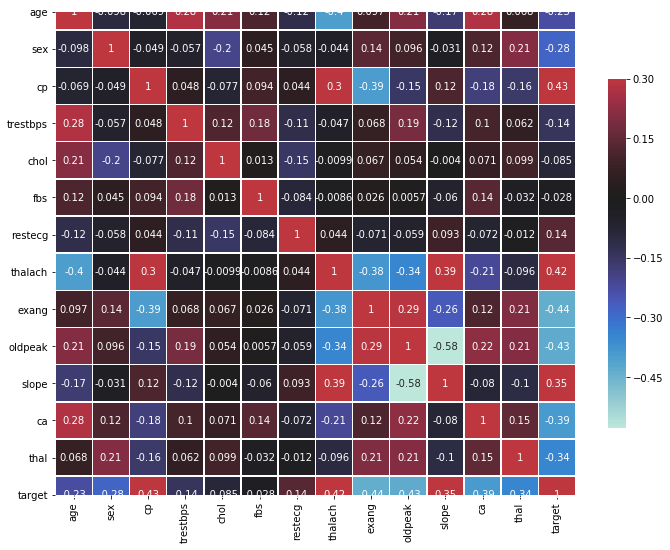

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

# Nous effectuerons une analyse sur les données d'entraînement. La relation entre les caractéristiques trouvées dans les données d'entraînement est observée. De cette façon, des commentaires sur les propriétés peuvent être faits

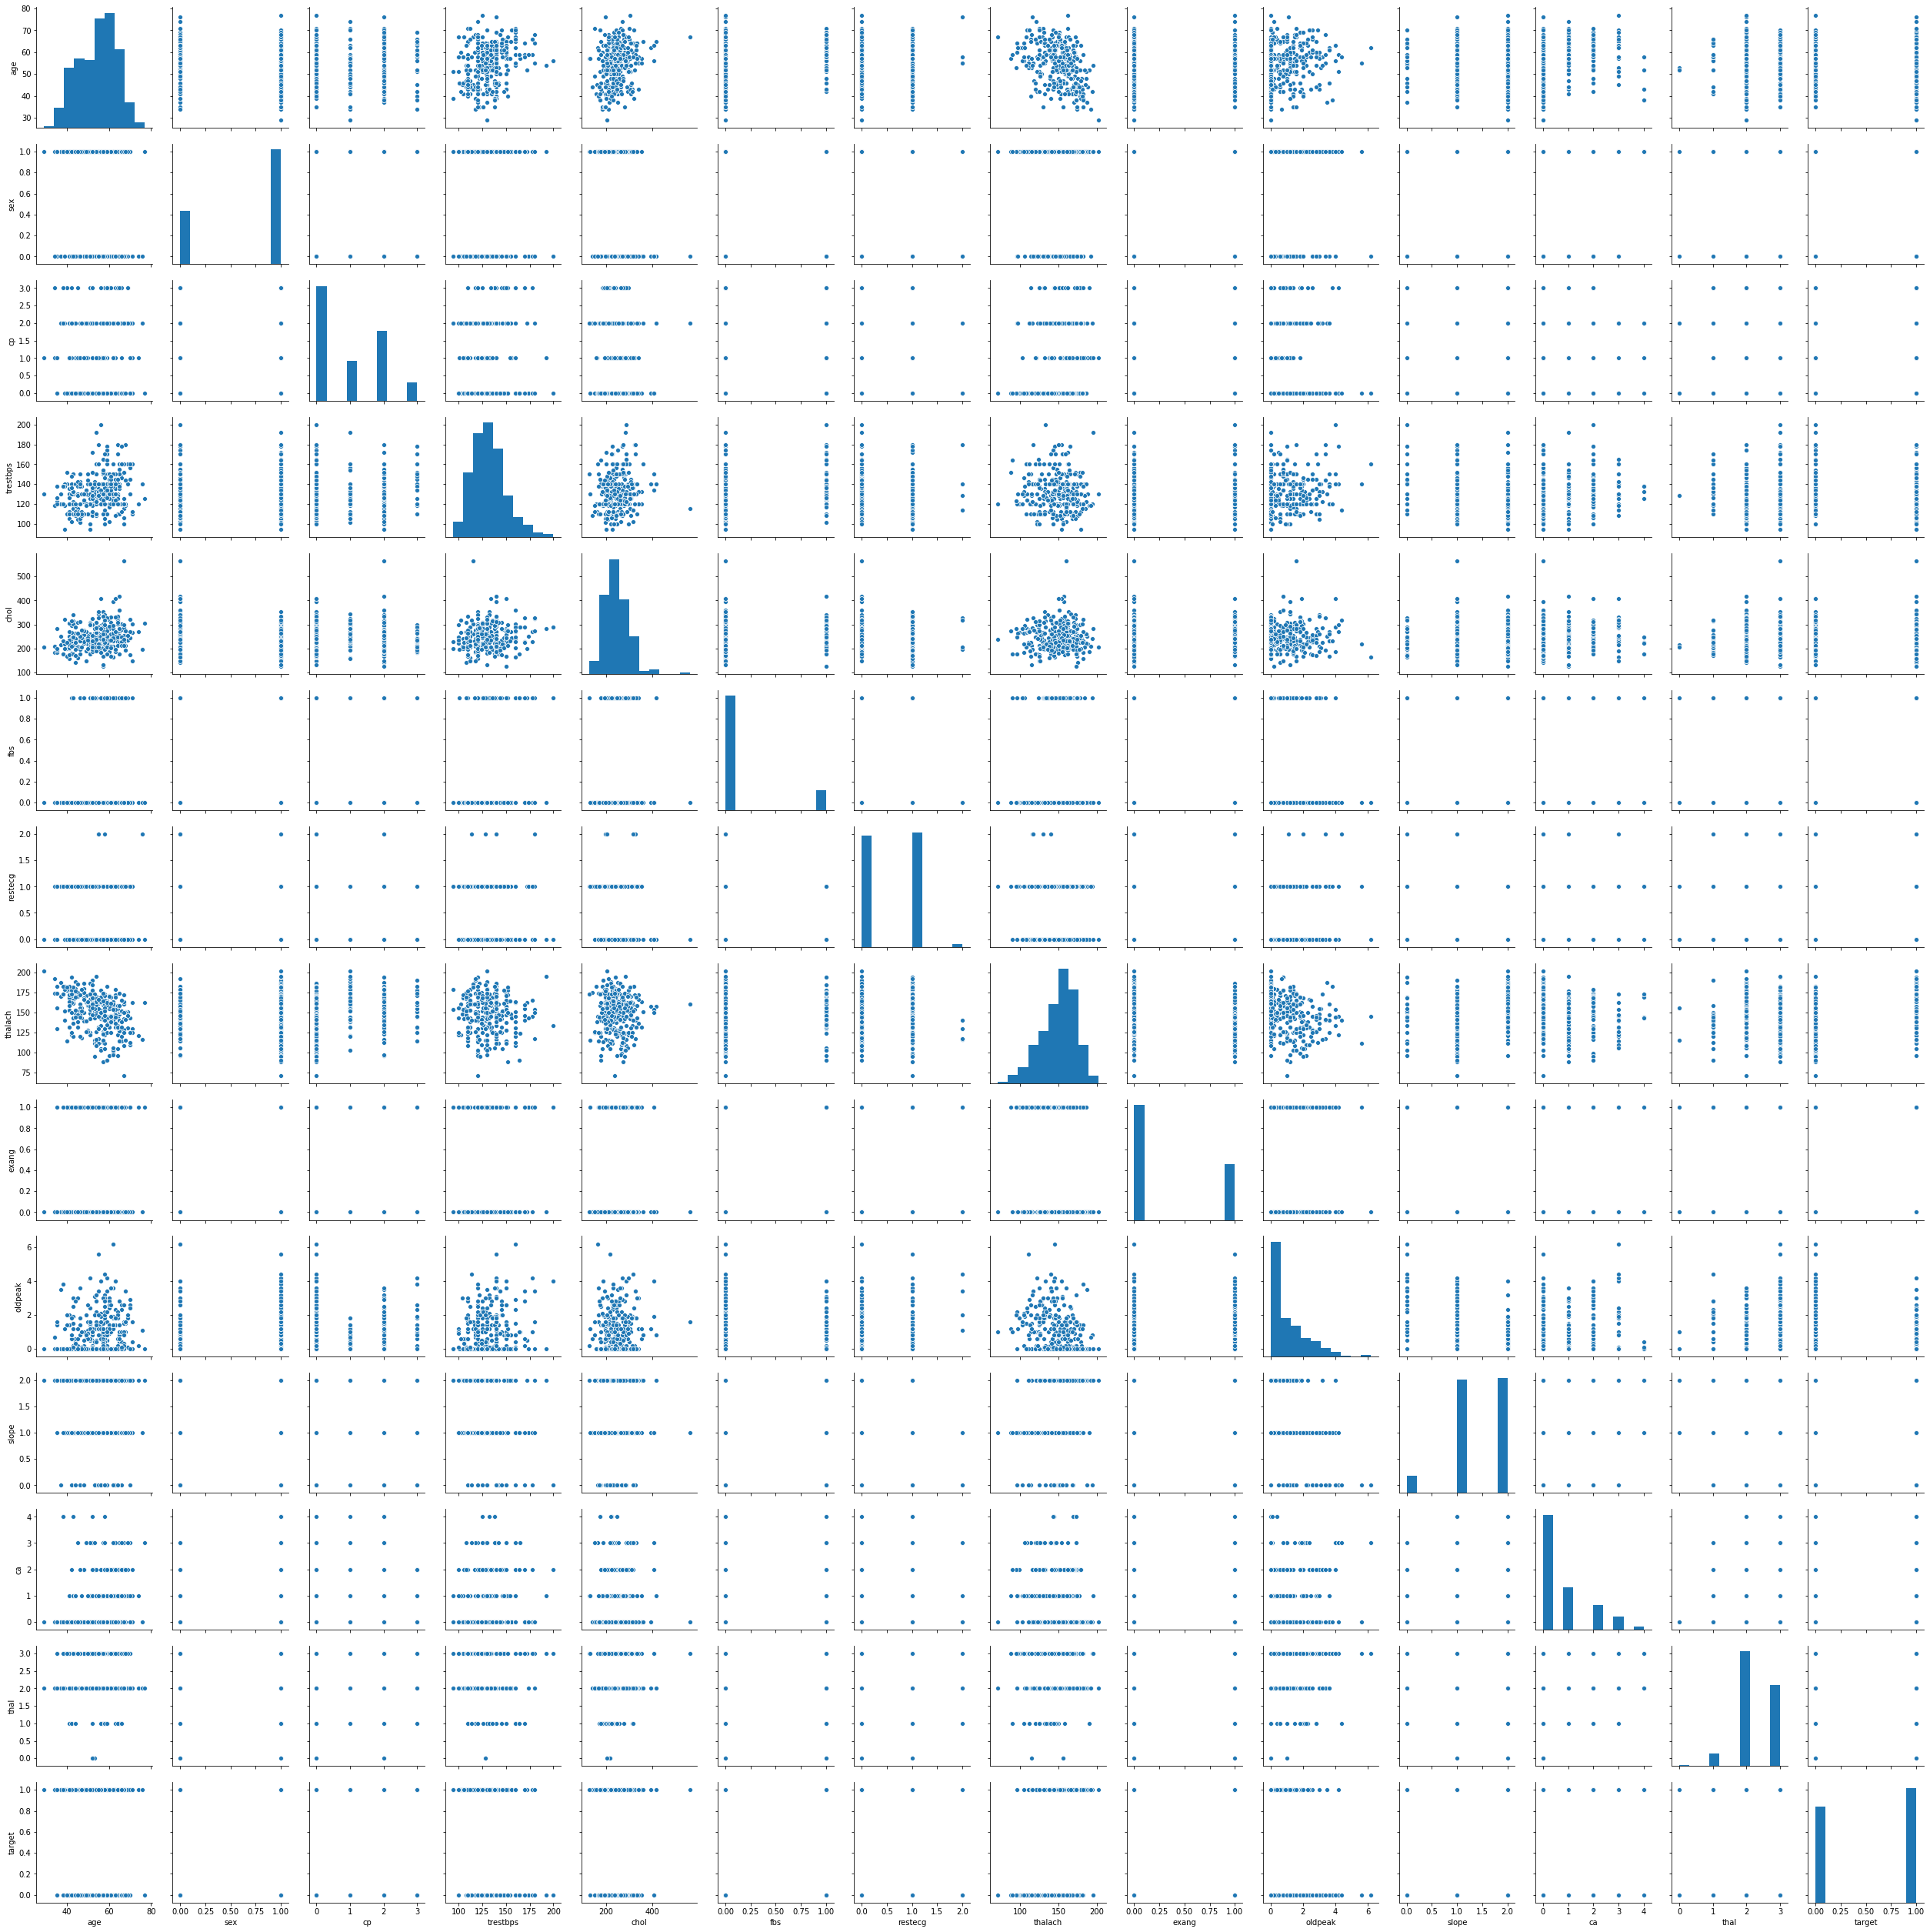

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
df.age.value_counts()[:10]
#data age show value counts for age least 10

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

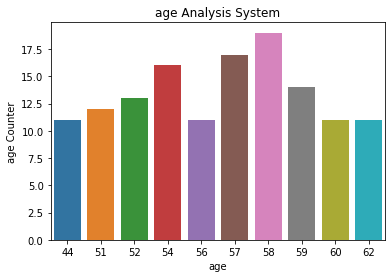

In [26]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('age')
plt.ylabel('age Counter')
plt.title('age Analysis System')
plt.show()

# Dans cette section, la meilleure analyse peut être divisée en personnes âgées, d'âge moyen, jeunes en regardant les tranches d'âge

In [27]:
#firstly find min and max ages
minage=min(df.age)
maxage=max(df.age)
meanage=df.age.mean()
print('Min Age :',minage)
print('Max Age :',maxage)
print('Mean Age :',meanage)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [28]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


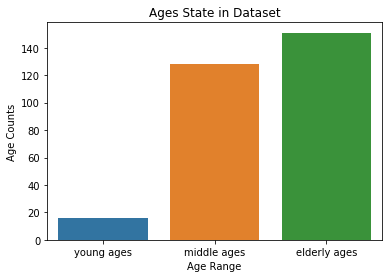

In [29]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

# Ainsi, une nouvelle valeur de fonctionnalité peut être supprimée de ces tranches d'âge n'affectera pas cet impact verra dans le futur.

In [30]:
print (type (df.groupby ('age'). mean ())) 
df.groupby ('age'). mean ()

<class 'pandas.core.frame.DataFrame'>


,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
29,1.000000,1.000000,130.000000,204.000000,0.000000,0.000000,202.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000
34,0.500000,2.000000,118.000000,196.000000,0.000000,0.500000,183.000000,0.000000,0.350000,2.000000,0.000000,2.000000,1.000000
35,0.750000,0.250000,126.500000,213.750000,0.000000,0.750000,160.500000,0.500000,0.750000,1.750000,0.000000,2.500000,0.500000
37,0.500000,2.000000,125.000000,232.500000,0.000000,1.000000,178.500000,0.000000,1.750000,1.000000,0.000000,2.000000,1.000000
38,1.000000,2.333333,132.000000,193.666667,0.000000,1.000000,176.000000,0.333333,1.266667,1.666667,2.666667,2.333333,0.666667
39,0.500000,1.500000,122.500000,239.750000,0.000000,0.750000,163.250000,0.000000,0.300000,1.500000,0.000000,2.250000,0.750000
40,1.000000,1.000000,134.000000,196.333333,0.000000,0.666667,157.666667,0.666667,1.133333,1.666667,0.000000,3.000000,0.333333
41,0.600000,1.200000,119.000000,220.700000,0.000000,0.600000,164.700000,0.100000,0.340000,1.800000,0.100000,2.000000,0.900000
42,0.750000,1.250000,127.000000,246.750000,0.125000,0.750000,160.250000,0.125000,0.500000,1.375000,0.250000,2.000000,0.875000


À la suite de nos évaluations initiales, nous avons utilisé un certain nombre d'algorithmes d'apprentissage artificiel. Il s'agit des algorithmes de régression logistique, k voisinage proche (kNN), GradientBoostingClassifier et RandomForestClassifier. Le premier algorithme est l'algorithme de régression logistique. Pour implémenter ce modèle d'algorithme, nous devons séparer les variables dépendantes et indépendantes dans nos ensembles de données. De plus, nous avons créé une combinaison de fonctionnalités entre différentes fonctionnalités pour réaliser différentes expériences. Lors de la création de ces paramètres, le processus de recherche des meilleurs résultats a été effectué en donnant des valeurs d'hyper paramètre.

In [31]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal' ]]
y=df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.88


H:\Nouveau dossier\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
confusion_matrix=pd.crosstab(logreg.predict(x),y)
print(confusion_matrix)

target    0    1
row_0           
0       108   13
1        30  152


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.85      0.93      0.89        57

    accuracy                           0.88       107
   macro avg       0.88      0.87      0.88       107
weighted avg       0.88      0.88      0.88       107



In [34]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

H:\Nouveau dossier\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


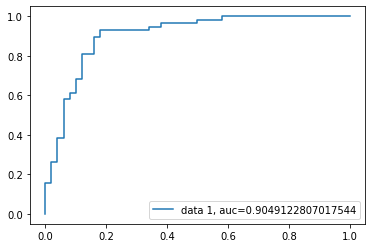

In [35]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# to examine and compare the accuracy of four different machine learning algorithms with receiver operating characteristic (ROC) curve for predicting and diagnosing heart disease by the 14 attributes from UCI Cardiac Datasets.

# Let's see what the above ROC gives us

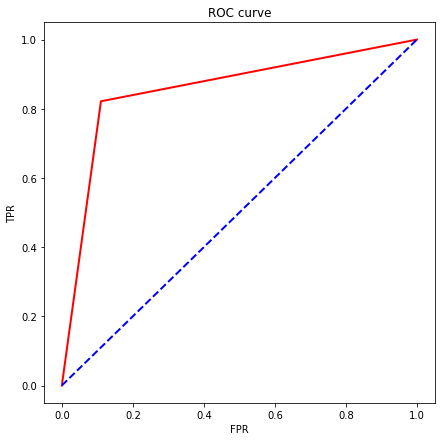

In [36]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(clf.predict(x),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# OK, so it's working well.

In [37]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction


#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7663551401869159


In [38]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.794392523364486


logistic regression :Accuracy=0.88
DecisionTreeClassifier:score:0.7570093457943925
RandomForestClassifier:Accuracy: 0.794392523364486
logistic regression is the best

# let's try

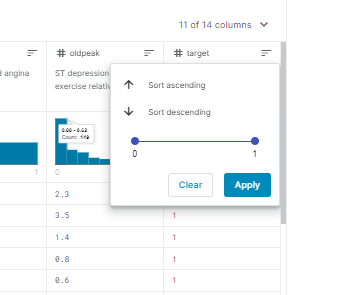

In [39]:
clf.predict([[20,0,0.5,0.6,2,3,1,2,5,4,1,0.5,0.8]])

array([0], dtype=int64)

In [40]:
clf.predict([[20,0,4,1.5,0.8,0,14,0,130,1,2,3,0]])


array([0], dtype=int64)

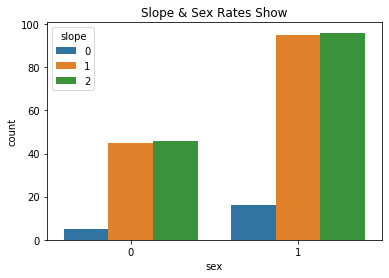

In [41]:
sns.countplot(df.sex,hue=df.slope)
plt.title('Slope & Sex Rates Show')
plt.show()

In [42]:
total_genders_count=len(df.sex)
male_count=len(df[df['sex']==1])
female_count=len(df[df['sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


In [43]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 68.32%
Female State: 31.68%
